<a href="https://colab.research.google.com/github/luizasampaio-s/todo8/blob/main/to_do_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TODO8 - Data Analytics - Módulo 4**


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### Perguntas a serem respondidas: 
◆ Primeiramente, coloque a coluna Funcionário como índice.

◆ Sabendo que a coluna meses não é necessária para a análise e deve ser retirada, qual a média de idade
dos funcionários?

◆ Dos funcionários que têm filhos, qual o número mais comum?

◆ Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?

◆ Quais são os tipos de instrução existentes?

◆ Qual a média de salário e idade das pessoas casadas?

◆ Qual o funcionário que possui maior salário (informe seus atributos)?

◆ Qual o funcionário que possui menor idade (informe seus atributos)?

◆ Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem 
instrução de 2o grau?

◆ Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos qualitativos para atributos
quantitativos. Ex: solteiro: 1, casado: 2, etc)

◆ Forneça pelo menos mais 3 informações que você achar interessante (Você pode se basear nessa análise
exploratória de dados feita em R:
http://cursos.leg.ufpr.br/ecr/analise-exploratoria-de-dados.html#o-conjunto-de-dados-milsa).

### 1 - Importação do conjunto de dados:



In [2]:
# Importando arquivo .csv
milsa = pd.read_csv('http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv')

### **1.1 Descrevendo os dados**

Após a importação do DataBase que será utilizado para a análise, será coletada informações sobre o mesmo com o propósito de ter o conhecimento sobre seu tamanho e tipos de variáveis. Em seguida, veremos os tipos de variáveis que integram o nosso dataset: 

In [3]:
# Verificação do tamanho do DataBase:
milsa.shape

(36, 8)

É possível concluir que o Dataset possui incialmente um total de *36* linhas/entradas, e 8 colunas/variáveis. Abaixo veremos os tipos das variáveis e,
 posteriormente, após a limpeza dos dados, construiremos um dicionário de váriaveis. 

In [4]:
display(milsa.dtypes)

Funcionario      int64
Est.civil       object
Inst            object
Filhos         float64
Salario        float64
Anos             int64
Meses            int64
Regiao          object
dtype: object

### **1.2 - Estatísticas descritivas**

In [5]:
(milsa.isnull().sum() / milsa.shape[0]).sort_values(ascending=False)

Filhos         0.444444
Funcionario    0.000000
Est.civil      0.000000
Inst           0.000000
Salario        0.000000
Anos           0.000000
Meses          0.000000
Regiao         0.000000
dtype: float64

In [6]:
milsa.isnull().head()

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False


**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

A coluna Filhos é a única que possui valores nulos *(0,44%)*, porém a análise será feita compreendendo que quando o valor da coluna Filhos for nulo isso significa que o funcionário em questão não tem filhos.

###**3 - Limpando os dados:**
Algumas instruções sobre o uso das variáveis ja foram passadas inicialmente, são elas:


1.   "Primeiramente, coloque a coluna Funcionário como índice."
2.   "Sabendo que a coluna meses não é necessária para a análise e deve ser retirada..."



In [8]:
# Colocando funcionário como index.
milsa.set_index('Funcionario', inplace = True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


### **Dicionário de variáveis:**

Após a limpeza dos dados, as variáveis que serão utilizadas para a análise são: 

`Est.civil`: Estado civil do funcionário.

`Inst`:	Grau de intrução/ Nível de escolaridade:

`Filhos`:	Quantidade de filhos

`Salario`: Fração do salário recebido pelo funcionário.

`Anos`:	Idade

`Regiao`: Capital, Interior, Outro.

### **4- Respondendo as perguntas**

1. Qual a média da idade dos funcionários?




In [9]:
# Idade média dos funcionarios
print (f'A média da idade dos funcionários é de {milsa["Anos"].mean().round()} anos')

A média da idade dos funcionários é de 35.0 anos



2.   Dos funcionários que têm filhos, qual o número mais comum?



In [13]:
print(f'A maioria dos funcionários que tem filhos possuem {milsa["Filhos"].mode()[0]} filhos.')

A maioria dos funcionários que tem filhos possuem 2.0 filhos.


In [11]:
milsa.query('`Est.civil` == "casado"')['Filhos'].value_counts()

2.0    7
1.0    5
0.0    4
3.0    3
5.0    1
Name: Filhos, dtype: int64

In [12]:
milsa.query('`Est.civil` == "solteiro"')['Filhos'].value_counts()

0.0    16
Name: Filhos, dtype: int64

- De 36 funcionários 20 não contém filhos e desses 20 funcionários , 16 são solteiros.

3. Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?

In [32]:
# Média e mediana dos salários.
mean_median_dict = {'Média': milsa['Salario'].mean() , 
                    'Mediana': milsa['Salario'].median()}

mean_median_sal = pd.DataFrame (mean_median_dict, index =[1])
mean_median_sal

,Média,Mediana
1,11.122222,10.165


- Por serem valores bem próximos, os valores indicam que não há uma dispariedade salarial alta entre seus funcionários. 

4. Quais são os tipos de instrução existentes?

In [39]:
# Quais são os tipos de instrução existentes?
inst = milsa['Inst'].unique()
(f'Os tipos de intrução existentes são: {inst[0]},{inst[1]} e {inst[2]}.')

'Os tipos de intrução existentes são: 1o Grau,2o Grau e Superior.'

4.1 - Existe relação entre o grau de instrução e o salário?

In [40]:
import matplotlib.pyplot as plt

In [41]:
milsa_mean_inst = milsa.groupby('Inst')['Salario'].mean().round()


# Criando dataframe a partir dos dados filtratos.
df_inst_salario = pd.DataFrame(milsa_mean_inst)
df_inst_salario.index.name = 'Grau de instrução'
df_inst_salario

,Salario
Grau de instrução,
1o Grau,8.0
2o Grau,12.0
Superior,16.0


- Através das médias salárias agrupadas por grau de instrução, pode-se analisar que quanto maior o grau de instrução maior é o salário. No gráfico abaixo, é possível visualizar melhor a relação entre salário e grau de instrução:

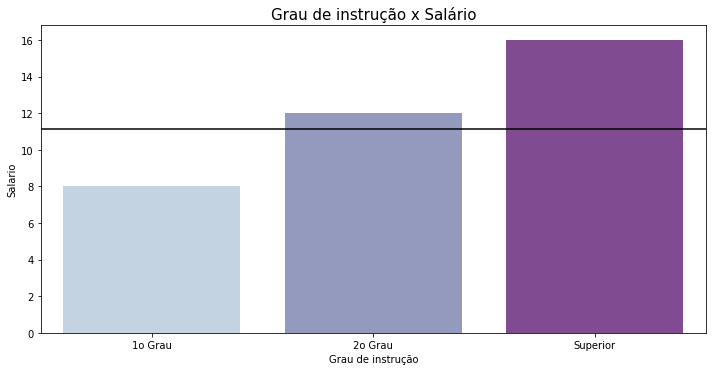

In [43]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,5))
#criando o gráfico de barras 
sns.barplot(x= df_inst_salario.index , y= df_inst_salario ['Salario'], ax=ax, data=df_inst_salario,palette='BuPu')
ax.axhline (milsa['Salario'].mean(),1,0, color = 'black')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title("Grau de instrução x Salário", fontdict={'fontsize':15});

5. Qual a média de salário e idade das pessoas casadas?

In [56]:
# Filtrando por estado civil
salary_age_married =  milsa.query('`Est.civil` == "casado" ')
salary_age_married[['Anos','Salario']].mean()

# Criando dataframe a partir dos dados filtratos.
df_married = pd.DataFrame(salary_age_married[['Anos','Salario']].mean())
df_married.rename(columns={0: 'Média'}, inplace = True)
df_married.round()


,Média
Anos,35.0
Salario,12.0


In [58]:
# Filtrando por estado civil
salary_age_single =  milsa.query('`Est.civil` == "solteiro" ')
salary_age_single[['Anos','Salario']].mean()

# Criando dataframe a partir dos dados filtratos.
df_single = pd.DataFrame(salary_age_single[['Anos','Salario']].mean())
df_single.rename(columns={0: 'Média'}, inplace = True)
df_single.round()

,Média
Anos,34.0
Salario,10.0


A média de idade das pessoas casadas é de aproximadamente 35 anos e a média salarial fica em cerca de R\$12.00. Já a média de idade das pessoas solteiras fica em torno de 33 anos, enquanto seus salários tem a média de R$10.00. 

6. Qual o funcionário que possui maior salário (informe seus atributos)?

In [14]:
milsa.query('Salario == Salario.max()')

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
36,casado,Superior,3.0,23.3,42,2,interior


7. Qual o funcionário que possui menor idade (informe seus atributos)?

In [15]:
milsa.query('Anos == Anos.min()')

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
4,solteiro,2o Grau,NaN,5.73,20,10,outro


8. Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

In [16]:
milsa.query('0 < Anos <= 35 & Regiao == "capital" & Inst == "2o Grau"')

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
9,casado,2o Grau,1.0,7.59,34,10,capital
17,casado,2o Grau,1.0,9.77,31,7,capital
22,solteiro,2o Grau,NaN,11.59,34,2,capital
30,casado,2o Grau,2.0,15.99,35,10,capital


9. Faça uma correlação entre todos os atributos.


In [17]:
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


Primeiro, criamos uma cópia do DataFrame original.

In [19]:
# Criando uma cópia do DataFrame original.
milsa_copy = milsa.copy()

Em seguida, criamos funções *lambda* para a substituição dos dados qualidade em dados quantitativos. Após a aplicação das funções esses serão os valores correspondentes:

**Grau de Instrução**(Inst)

> | Valor qualitativo    | Valor quantitativo|     
| ----------- | ----------- | 
| 1o Grau   | 1     |
| 2o Grau   | 2       |
| Superior |3

**Regiao**

> | Valor qualitativo    | Valor quantitativo      |
| ----------- | ----------- |
| Capital  | 1     |
| Interior   | 2       |
| Outro |3

**Estado Civil** (Est.civ)

> | Valor qualitativo    | Valor quantitativo      |
| ----------- | ----------- |
| Casado | 1     |
| Solteiro | 2       |



In [20]:
# Criação das funções
funcao_inst = lambda x: 1 if x == '1o Grau' else 2 if x == '2o Grau' else 3 if x == 'Superior' else 0
funcao_reg = lambda x: 1 if x == 'capital' else 2 if x == 'interior' else 3 if x == 'outro' else 0
funcao_estciv = lambda x: 1 if x == 'casado' else 2 if x == 'solteiro' else 0

In [21]:
# Aplicação das funções
milsa_copy['Est.civil'] = milsa_copy['Est.civil'].apply(funcao_estciv)
milsa_copy['Regiao'] = milsa_copy['Regiao'].apply(funcao_reg)
milsa_copy['Inst'] = milsa_copy['Inst'].apply(funcao_inst)

In [26]:
milsa_copy.corr()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Est.civil,1.000000,-0.108465,-0.664838,-0.247488,-0.095369,0.213498
Inst,-0.108465,1.000000,0.114723,0.639350,-0.216011,-0.033082
Filhos,-0.664838,0.114723,1.000000,0.375551,0.422981,-0.161297
Salario,-0.247488,0.639350,0.375551,1.000000,0.363362,-0.093966
Anos,-0.095369,-0.216011,0.422981,0.363362,1.000000,-0.077851
Regiao,0.213498,-0.033082,-0.161297,-0.093966,-0.077851,1.000000


Acima foi aplicada a função de correlação pd.corr() e abaixo podemos ver de forma mais intuitiva a forma da correlação entre as variáveis. Sendo os valores próximos de 1(positivo ou negativo) indicadores de uma forte correlação e os valores próximos de 0(positivo ou negativo) indicadores de uma correlação fraca.

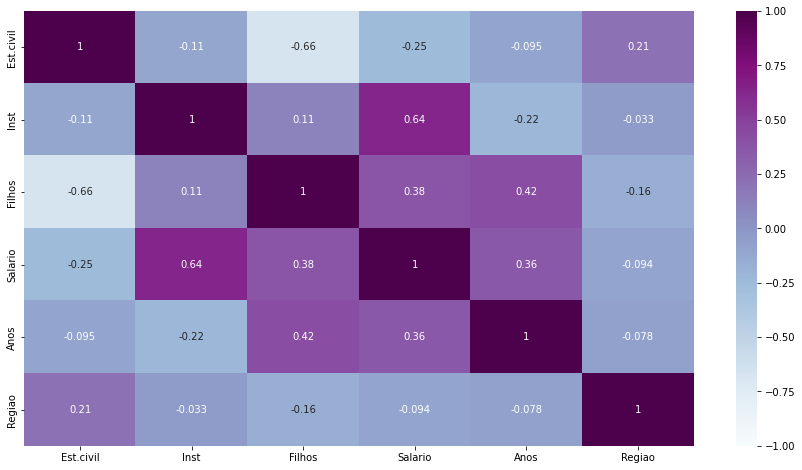

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(milsa_copy.corr(), vmin=-1.0, vmax=1.0, cmap='BuPu', annot=True)
print()

-  A partir dos dados de correlação, pode-se concluir que algumas variáveis como por exemplo Inst. e salário possuem uma correlação considerável, porém no geral a correlação entre as variáveis não se trata de uma correlação forte.

10. Informações adicionais: 

10.1 - Há alguma relação entre idade e salário?

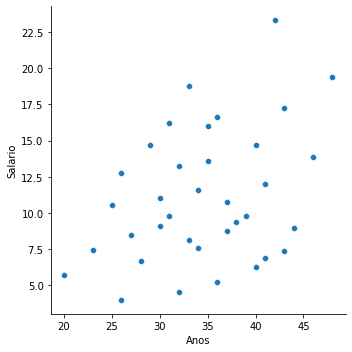

In [126]:
# Anos x Salario
sns.relplot (x="Anos", y="Salario",
            height=5, data=milsa);

In [26]:
milsa.query('Anos < 30')['Salario'].mean()

8.7875

In [28]:
milsa.query('Anos >= 30')['Salario'].mean().round()

12.0

Observando o mapa de dispersão, pode-se visualizar uma tendencia positiva dos anos em relação ao salário e ao tirar a média salarial dos funcionários vemos que a média das pessoas com mais de 30 anos é a maior que a média dos funcionários com menos de 30.Abaixo analisaremos a possível causa.


In [119]:
milsa.query('Anos < 30')['Inst'].value_counts()

2o Grau     5
1o Grau     3
Superior    2
Name: Inst, dtype: int64

In [120]:
milsa.query('Anos >= 30')['Inst'].value_counts()

2o Grau     15
1o Grau      9
Superior     4
Name: Inst, dtype: int64

- Em uma análise posterior concluimos que quanto maior o grau de intrução de um funcionário, maior é o seu salário e número de pessoas acima dos 30 anos possuem maior nivel de instrução e isso pode explicar o porquê da média salárial desses funcionários serem maior do que a média dos demais. 

In [104]:
# Regiao x salário
milsa_mean_reg = milsa.groupby('Regiao')['Salario'].mean().round()
df_milsa_mean_reg = pd.DataFrame(milsa_mean_reg)
df_milsa_mean_reg.reset_index(inplace = True)
df_milsa_mean_reg

,Regiao,Salario
0,capital,11.0
1,interior,12.0
2,outro,10.0


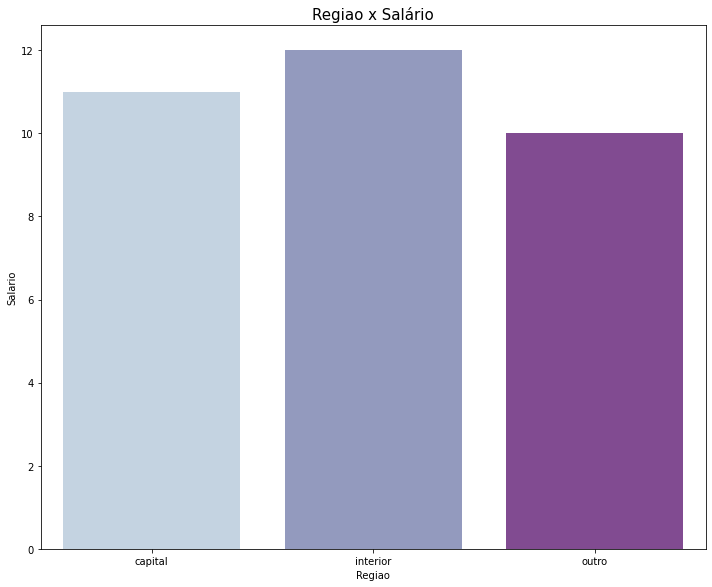

In [112]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(y= df_milsa_mean_reg['Salario'] , x= df_milsa_mean_reg['Regiao'], ax=ax, data=df_inst_salario,palette='BuPu')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title("Regiao x Salário", fontdict={'fontsize':15});

In [60]:
# Regiao x Inst

inst_reg = pd.DataFrame(milsa.groupby('Regiao')['Inst'].value_counts())
inst_reg.columns = ['Insta']
reset_df = inst_reg.reset_index()
reset_df

,Regiao,Inst,Insta
0,capital,2o Grau,5
1,capital,1o Grau,4
2,capital,Superior,2
3,interior,2o Grau,7
4,interior,1o Grau,3
5,interior,Superior,2
6,outro,2o Grau,6
7,outro,1o Grau,5
8,outro,Superior,2


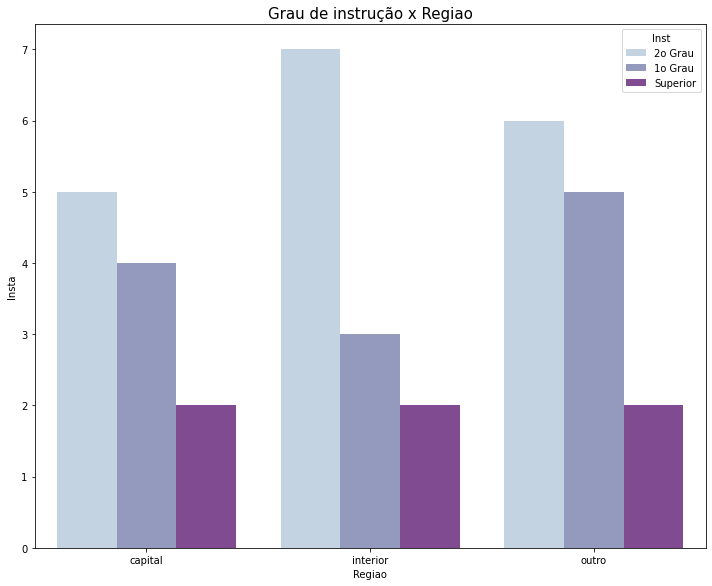

In [111]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(x = reset_df['Regiao'] ,y = reset_df['Insta'], hue = reset_df['Inst'], ax=ax, data=df_inst_salario,palette='BuPu')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title('Grau de instrução x Regiao', fontdict={'fontsize':15});

In [98]:
milsa.query('Anos < 30 ')['Inst'].value_counts()

1o Grau     3
2o Grau     3
Superior    2
Name: Inst, dtype: int64